# mental_health_finaldata_1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data=pd.read_csv("mental_health_finaldata_1.csv")
data

,Age,Gender,Occupation,Days_Indoors,Growing_Stress,Quarantine_Frustrations,Changes_Habits,Mental_Health_History,Weight_Change,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness
0,20-25,Female,Corporate,1-14 days,Yes,Yes,No,Yes,Yes,Medium,No,No,Yes
1,30-Above,Male,Others,31-60 days,Yes,Yes,Maybe,No,No,High,No,No,Yes
2,30-Above,Female,Student,Go out Every day,No,No,Yes,No,No,Medium,Yes,Maybe,No
3,25-30,Male,Others,1-14 days,Yes,No,Maybe,No,Maybe,Medium,No,Maybe,Yes
4,16-20,Female,Student,More than 2 months,Yes,Yes,Yes,No,Yes,Medium,Yes,Maybe,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,20-25,Male,Corporate,Go out Every day,No,Yes,No,Yes,Yes,Medium,No,Yes,Maybe
820,20-25,Male,Others,1-14 days,Yes,Yes,No,Yes,Maybe,Low,No,Maybe,Maybe
821,20-25,Male,Student,More than 2 months,Yes,Maybe,Maybe,No,Yes,High,Yes,Yes,Maybe
822,16-20,Male,Business,15-30 days,No,No,Maybe,No,Maybe,Low,Yes,No,Maybe


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      824 non-null    object
 1   Gender                   824 non-null    object
 2   Occupation               824 non-null    object
 3   Days_Indoors             824 non-null    object
 4   Growing_Stress           824 non-null    object
 5   Quarantine_Frustrations  824 non-null    object
 6   Changes_Habits           824 non-null    object
 7   Mental_Health_History    824 non-null    object
 8   Weight_Change            824 non-null    object
 9   Mood_Swings              824 non-null    object
 10  Coping_Struggles         824 non-null    object
 11  Work_Interest            824 non-null    object
 12  Social_Weakness          824 non-null    object
dtypes: object(13)
memory usage: 83.8+ KB


In [4]:
data["Days_Indoors"].value_counts()

Days_Indoors
31-60 days            171
1-14 days             170
Go out Every day      168
More than 2 months    160
15-30 days            155
Name: count, dtype: int64

In [5]:
def process_indoors_day(x):
    if x == "31-60 days":
        return 45
    elif x == "1-14 days":
        return 7
    elif x == "15-30 days":
        return 22
    elif x == "Go out Every day":
        return 0
    else:
        return 75
    
data["Days_indoor_numeric"] =  data["Days_Indoors"].apply(process_indoors_day) 
data.head()

,Age,Gender,Occupation,Days_Indoors,Growing_Stress,Quarantine_Frustrations,Changes_Habits,Mental_Health_History,Weight_Change,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,Days_indoor_numeric
0,20-25,Female,Corporate,1-14 days,Yes,Yes,No,Yes,Yes,Medium,No,No,Yes,7
1,30-Above,Male,Others,31-60 days,Yes,Yes,Maybe,No,No,High,No,No,Yes,45
2,30-Above,Female,Student,Go out Every day,No,No,Yes,No,No,Medium,Yes,Maybe,No,0
3,25-30,Male,Others,1-14 days,Yes,No,Maybe,No,Maybe,Medium,No,Maybe,Yes,7
4,16-20,Female,Student,More than 2 months,Yes,Yes,Yes,No,Yes,Medium,Yes,Maybe,No,75


In [6]:
yes_count = data.loc[data["Growing_Stress"] == "Yes"].shape[0]
total = data.shape[0]
percentage = (yes_count / total) * 100
round(percentage, 2)

36.53

In [9]:
contingency_mental=pd.crosstab(data['Occupation'],data['Mental_Health_History'])
contingency_mental

Mental_Health_History,Maybe,No,Yes
Occupation,,,
Business,44,57,44
Corporate,62,49,48
Housewife,64,62,59
Others,47,52,56
Student,65,64,51


<Axes: xlabel='Days_Indoors', ylabel='count'>

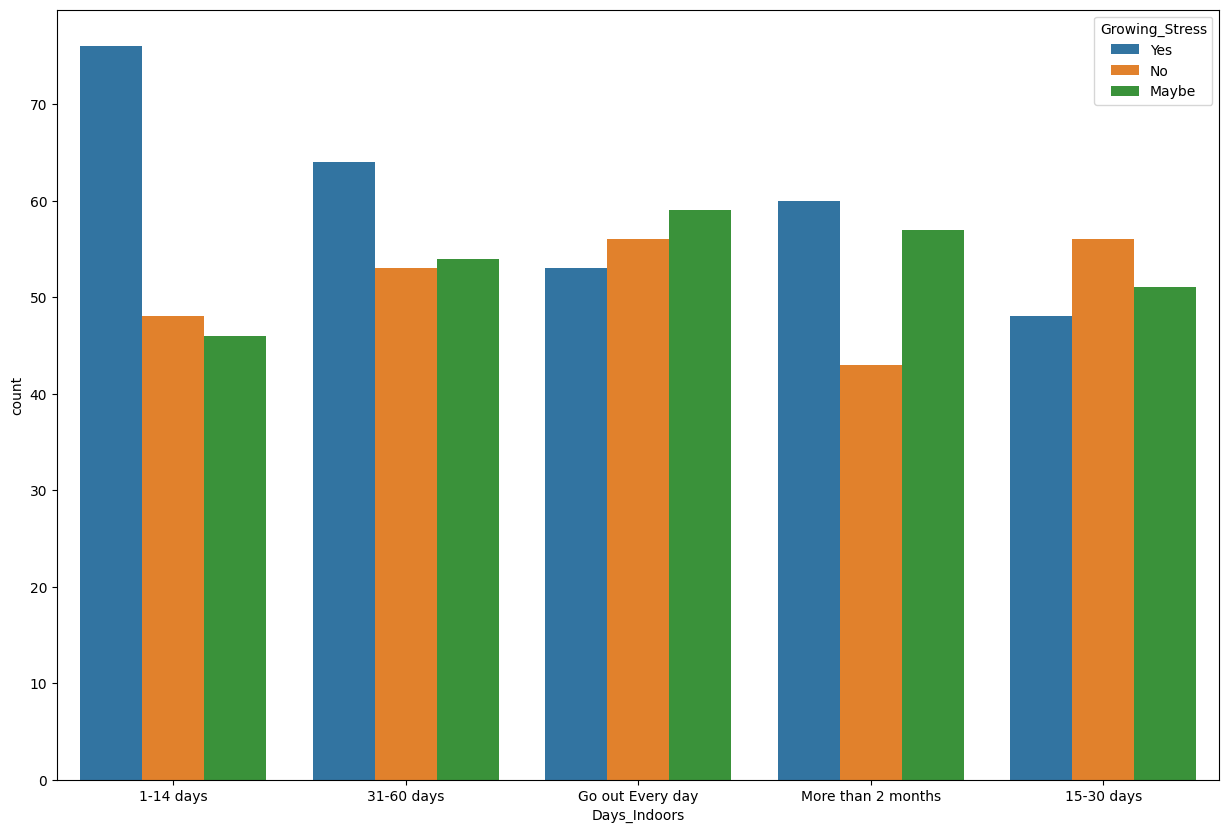

In [10]:
plt.figure(figsize=(15,10))
sns.countplot(data = data, x = "Days_Indoors", hue="Growing_Stress")

In [11]:
df = data.groupby(["Days_Indoors","Quarantine_Frustrations","Changes_Habits"]).size().reset_index()
df

,Days_Indoors,Quarantine_Frustrations,Changes_Habits,0
0,1-14 days,Maybe,Maybe,13
1,1-14 days,Maybe,No,16
2,1-14 days,Maybe,Yes,20
3,1-14 days,No,Maybe,21
4,1-14 days,No,No,12
5,1-14 days,No,Yes,20
6,1-14 days,Yes,Maybe,27
7,1-14 days,Yes,No,16
8,1-14 days,Yes,Yes,25
9,15-30 days,Maybe,Maybe,13


<Axes: xlabel='Days_Indoors', ylabel='Avg Count Quarantine_Frustrations'>

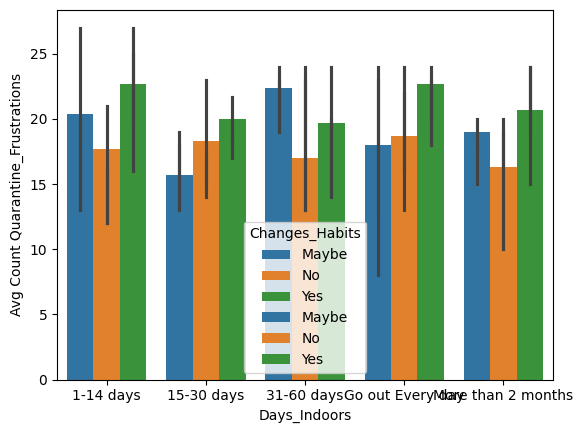

In [12]:
sns.barplot(data=df, x ="Days_Indoors", y =0, hue="Quarantine_Frustrations" )
plt.ylabel("Avg Count Quarantine_Frustrations")
sns.barplot(data=df, x ="Days_Indoors", y =0, hue="Changes_Habits" )

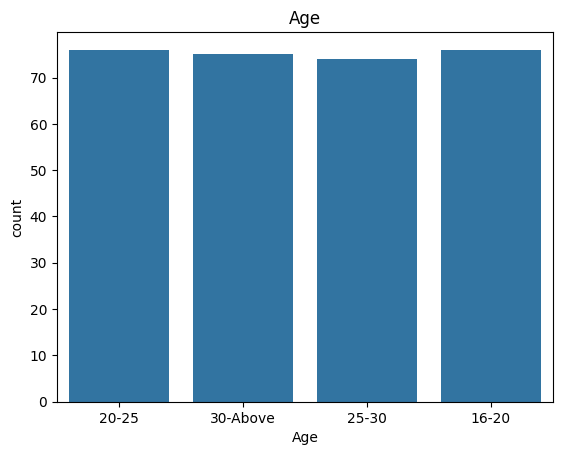

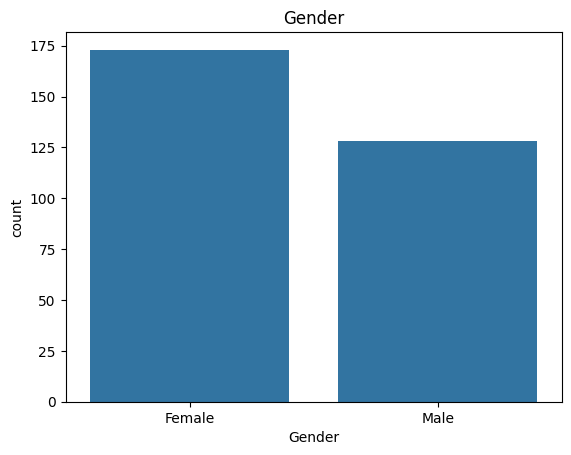

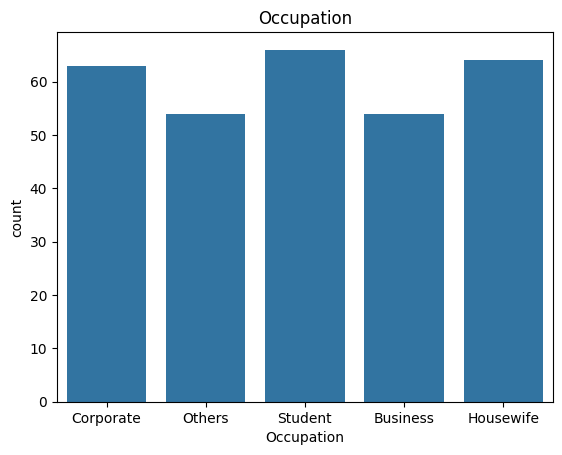

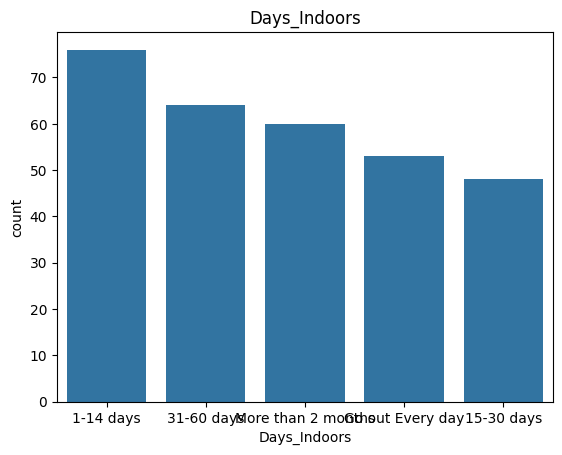

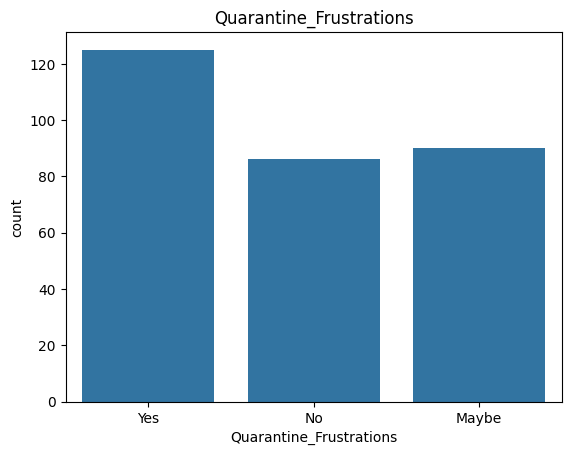

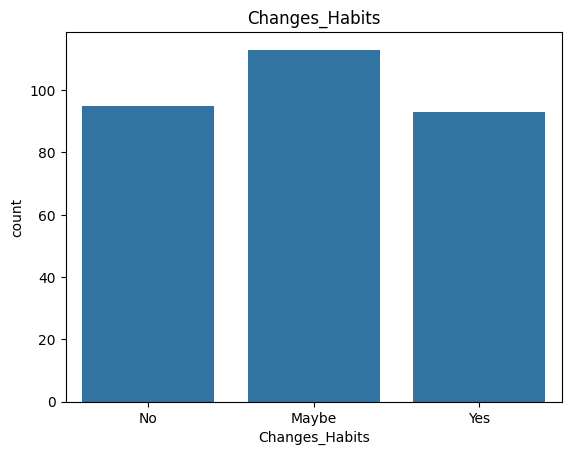

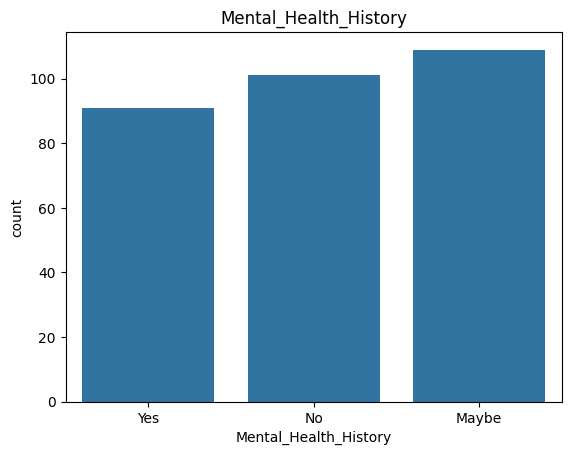

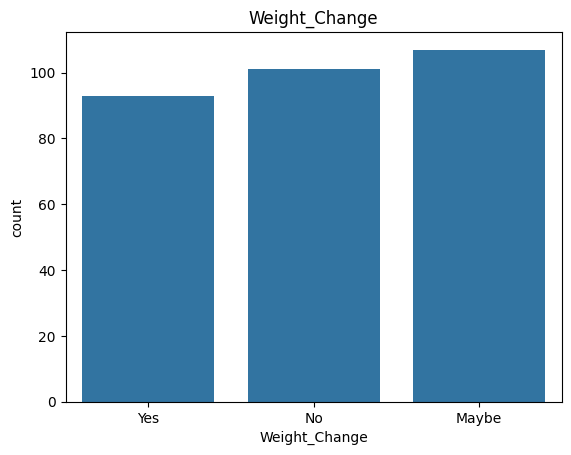

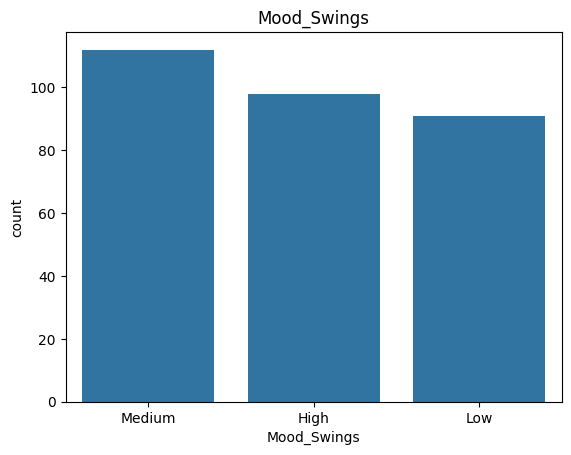

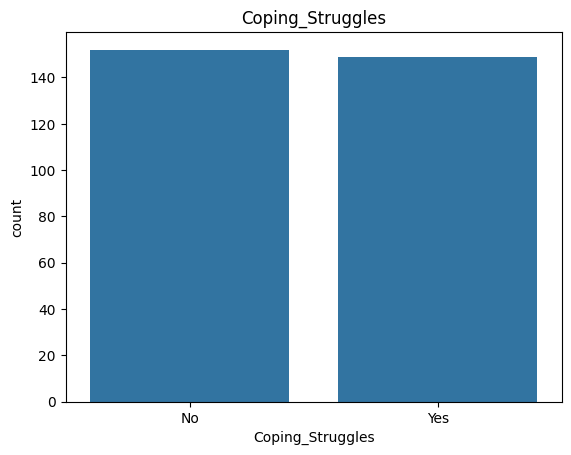

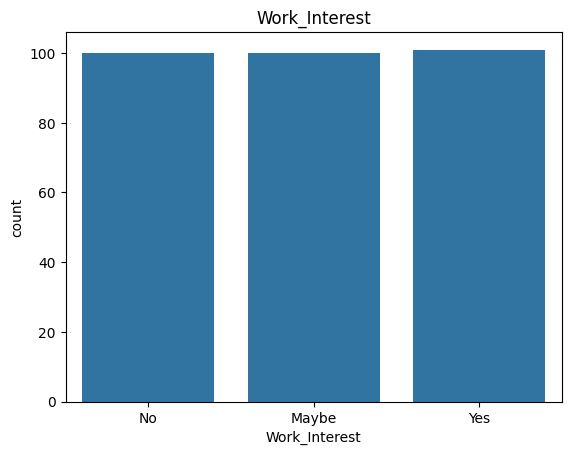

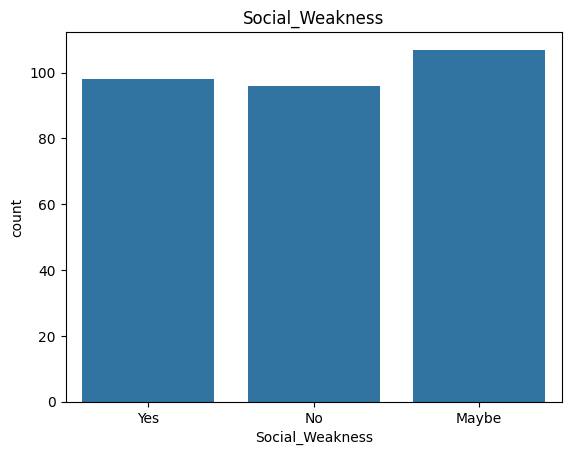

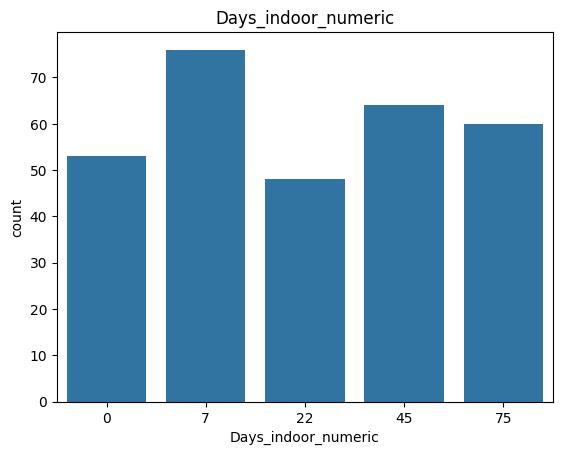

In [13]:
for i in data.loc[data["Growing_Stress"] == "Yes"].columns:
    if i != "Growing_Stress":
        plt.figure()
        sns.countplot(data=data.loc[data["Growing_Stress"] == "Yes"], x = i)
        plt.title(i)
        plt.show()